In [4]:
# dark mode for jupyter
!jt -t oceans16 -T -N -kl

In [1]:
'''
dev-v5_ocean_optics_proj.ipynb
@author TEJ
@date 2023-03-14 thru 2023-0
'''
import numpy as np
import pandas as pd 
import xarray as xr
import netCDF4 as nc
import datetime as dt
from matplotlib import pyplot as plt 
import seaborn as sns
import urllib.request

import erddapClient as erd

In [85]:
#initializing palettes and iteration lists
colors_black = ["00000","#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]
pal_black = sns.color_palette(colors_black)
colors = ["#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]
pal = sns.color_palette(colors)
colors_r = ["#ff0000", "#ff7700", "#b3ff00", "#00ff00", "#00ffff", "#001bff", "#7b00e2"]
pal_r = sns.color_palette(colors_r)
#lists
wavelengthnm_list = ["spectir_412nm","spectir_443nm","spectir_490nm","spectir_510nm","spectir_555nm","spectir_620nm","spectir_683nm"]
wavelength_list_int = [413,443,490,510,555,620,683]
wavelength_list = ["412","443","490","510","555","620","683"]
wavelengthqc_agg_list = ["spectir_412nm_qc_agg","spectir_443nm_qc_agg","spectir_490nm_qc_agg","spectir_510nm_qc_agg","spectir_555nm_qc_agg","spectir_620nm_qc_agg","spectir_683nm_qc_agg"]
mooring_list = ["or_inshore", "or_shelf","wa_inshore","wa_shelf"]
data_id_list = ["ooi-ce01issp-sp001-07-spkirj000", "ooi-ce02shsp-sp001-06-spkirj000", 
                "ooi-ce06issp-sp001-07-spkirj000", "ooi-ce07shsp-sp001-06-spkirj000"]
maxdepths = [-18.,-69.,-24.,-74.] # use int(maxdepths[2]) to get iterable thing for k loop in filtering task

In [3]:
#data from Coastal Endurance: Oregon Inshore Surface Piercing Profiler Mooring
remote_td = erd.ERDDAP_Tabledap('http://erddap.dataexplorer.oceanobservatories.org/erddap','ooi-ce01issp-sp001-07-spkirj000')
responseDf = (
    remote_td.setResultVariables(['time','z','spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm', 'spectir_683nm'])
            .getDataFrame()
)
#remove units from column names
responseDf.columns = responseDf.columns.str.split(' ').str[0] 

#creating pivoted corresponding table: pivoting to make data long
responseDf_pivoted = pd.melt(responseDf, id_vars=['time', 'z'], value_vars=wavelengthnm_list,var_name='wavelength', 
                           value_name='spectir')

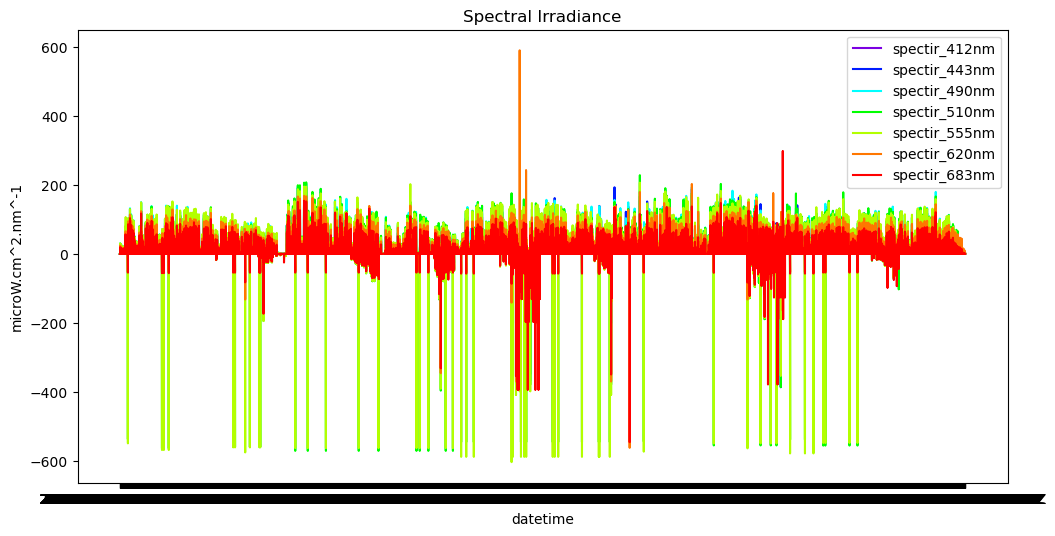

In [4]:
plt.figure(figsize=(12,6), dpi=100)
for i in range(0,7):
    plt.plot(responseDf["time"], responseDf[wavelengthnm_list[i]], 
             label = wavelengthnm_list[i], color = pal[i])


plt.title('Spectral Irradiance')
plt.xlabel("datetime")
plt.ylabel("microW.cm^2.nm^-1")
plt.legend()

In [5]:
# importing data for all 4 sites
#doing this again but saving the data to a list of dfs
#querying using ERDDAP package/whatever function, so not saving to middle csvs. nice because no external data to this file.
mooring_dfs = []
for i in range(0,4):
    
    remote_td = erd.ERDDAP_Tabledap('http://erddap.dataexplorer.oceanobservatories.org/erddap',data_id_list[i])
    df = (remote_td.setResultVariables(['time','z',
                                        'spectir_412nm','spectir_412nm_qc_agg',
                                        'spectir_443nm','spectir_443nm_qc_agg',
                                        'spectir_490nm','spectir_490nm_qc_agg', 
                                        'spectir_510nm','spectir_510nm_qc_agg', 
                                        'spectir_555nm','spectir_555nm_qc_agg',
                                        'spectir_620nm','spectir_620nm_qc_agg',
                                        'spectir_683nm','spectir_683nm_qc_agg']).getDataFrame()
                    )
    df.columns = df.columns.str.split(' ').str[0]
    df['time'] = df['time'].to_numpy(dtype='datetime64')
    mooring_dfs.append(df)

In [6]:
mooring_dfs[0]

,time,z,spectir_412nm,spectir_412nm_qc_agg,spectir_443nm,spectir_443nm_qc_agg,spectir_490nm,spectir_490nm_qc_agg,spectir_510nm,spectir_510nm_qc_agg,spectir_555nm,spectir_555nm_qc_agg,spectir_620nm,spectir_620nm_qc_agg,spectir_683nm,spectir_683nm_qc_agg
0,2014-04-17 22:28:00,-20.0,0.030614,NaN,0.023073,NaN,0.139625,NaN,0.220813,NaN,0.442157,NaN,-0.002197,NaN,0.005706,NaN
1,2014-04-17 22:28:00,-19.0,0.037231,NaN,0.030066,NaN,0.171555,NaN,0.269376,NaN,0.528362,NaN,-0.000152,NaN,0.006310,NaN
2,2014-04-17 22:28:00,-18.0,0.048694,NaN,0.042189,NaN,0.218303,NaN,0.344181,NaN,0.669369,NaN,0.004723,NaN,0.007052,NaN
3,2014-04-17 22:28:00,-17.0,0.057129,NaN,0.050411,NaN,0.250974,NaN,0.395703,NaN,0.766718,NaN,0.007724,NaN,0.007074,NaN
4,2014-04-17 22:28:00,-16.0,0.065813,NaN,0.059395,NaN,0.283560,NaN,0.446932,NaN,0.865479,NaN,0.013464,NaN,0.007337,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49938,2022-09-27 07:53:00,-5.0,0.010989,NaN,-0.002785,NaN,0.010997,NaN,0.007728,NaN,-0.006375,NaN,-0.005846,NaN,0.008078,NaN
49939,2022-09-27 07:53:00,-4.0,0.010630,NaN,-0.002738,NaN,0.010916,NaN,0.007805,NaN,-0.006242,NaN,-0.005502,NaN,0.007749,NaN
49940,2022-09-27 07:53:00,-3.0,0.010466,NaN,-0.002522,NaN,0.010447,NaN,0.007654,NaN,-0.007148,NaN,-0.005562,NaN,0.007265,NaN
49941,2022-09-27 07:53:00,-2.0,0.010201,NaN,-0.002446,NaN,0.010259,NaN,0.007780,NaN,-0.006556,NaN,-0.005270,NaN,0.006446,NaN


In [215]:
#dev
filtered_mooring_dfs = []
for i in range(0,1): #dev doing only first df, oregon_inshore
    #we want four dataframes in our filtered_ list
    df = mooring_dfs[i]
    site_maxdepth = maxdepths[i]

    for j in range(0,7): #number of wavelngths in each df
        wavelength = wavelengthnm_list[j]
        print(j,wavelength, len(df))
        df = df.drop(df[df[wavelength] < 0].index)
        print(len(df),"after removing below 0s")
        df = df.drop(df[df[wavelengthqc_agg_list[j]] == 4.].index)
        print(len(df),"after removing fail=4s")
        
        
    df.drop(columns=wavelengthqc_agg_list, inplace=True)
    filtered_mooring_dfs.append(df)

0 spectir_412nm 49943
37334 after removing below 0s
37325 after removing fail=4s
1 spectir_443nm 37325
34137 after removing below 0s
34137 after removing fail=4s
2 spectir_490nm 34137
29608 after removing below 0s
29608 after removing fail=4s
3 spectir_510nm 29608
29550 after removing below 0s
29550 after removing fail=4s
4 spectir_555nm 29550
29280 after removing below 0s
29280 after removing fail=4s
5 spectir_620nm 29280
27807 after removing below 0s
27807 after removing fail=4s
6 spectir_683nm 27807
25314 after removing below 0s
25314 after removing fail=4s


In [29]:
filtered_mooring_dfs = []

for i in range(0,4): 
    #we want four dataframes in our filtered_ list
    df = mooring_dfs[i]
    site_maxdepth = maxdepths[i]
    df = df.drop(df[df["z"] < site_maxdepth].index)
    for j in range(0,7): #number of wavelngths in each df
        wavelength = wavelengthnm_list[j]
        #print(j,wavelength, len(df))
        df = df.drop(df[df[wavelength] < 0.00].index)
        #print(len(df),"after removing below 0s")
        df = df.drop(df[df[wavelengthqc_agg_list[j]] == 4.].index)
        #print(len(df),"after removing fail=4s")

        #dev wavelen_mean_list = [] #just to see qualitatively where depth cutoffs should go
            #list of depth averages for one wavelength will go in here
            #so there should be 7 lists per 4 sites
        #initializing empty df for the new z-chunked dataframe
        depthchunked_df = pd.DataFrame(columns=df.columns).reindex(index=[])

        for k in range(0,int(site_maxdepth-1),-1): #0,-1,-2,...,-25
            # calculate the mean and standard deviation of each wavelength column j
            #isolating rows at the iterated depth into a new dataframe
            z_df = df.loc[df['z'] == k]
            #taking the mean and std of spectral irradiance for the specific wavelength col (one loop up)
            z_mean = z_df[wavelength].mean()
            #dev wavelen_mean_list.append(z_mean) #adding to list for gigs. in next one up make list of lists. 4*7
            z_std = z_df[wavelength].std()
            #observe 2 and 3 sigma ranges
            sigma2 = z_mean + 2*z_std
            sigma3 = z_mean + 3*z_std
            # filter the rows that have values below the upper limit for the specified column
            filtrd_z_df = z_df.loc[(z_df[wavelength] <= sigma3)]
            # return the good data, for a specifc z, to an initialized dataframe
            depthchunked_df=depthchunked_df.append(filtrd_z_df)        

    #result if filtered dataframe for entire site
    df_filtered = depthchunked_df.sort_values(by='time')
    df_filtered = df_filtered.reset_index(drop=True)
    df_filtered.drop(columns=wavelengthqc_agg_list, inplace=True)
    filtered_mooring_dfs.append(df_filtered)

In [27]:
print("oregon inshore has",len(mooring_dfs[0][(mooring_dfs[0][wavelengthnm_list] < 0).any(axis=1)]),"rows with any λ col < 0")
print("oregon shelf has",len(mooring_dfs[1][(mooring_dfs[1][wavelengthnm_list] < 0).any(axis=1)]),"rows with any λ col < 0")
print("washington inshore has",len(mooring_dfs[2][(mooring_dfs[2][wavelengthnm_list] < 0).any(axis=1)]),"rows with any λ col < 0")
print("washington shelf has",len(mooring_dfs[3][(mooring_dfs[3][wavelengthnm_list] < 0).any(axis=1)]),"rows with any λ col < 0")

oregon inshore has 24624 rows with any λ col < 0
oregon shelf has 74983 rows with any λ col < 0
washington inshore has 23151 rows with any λ col < 0
washington shelf has 45618 rows with any λ col < 0


In [20]:
print("oregon inshore has",len(mooring_dfs[0][mooring_dfs[0]["spectir_412nm"] < 0.00]),"λ=412 values below 0")
print("oregon inshore has",len(mooring_dfs[0][mooring_dfs[0]["spectir_443nm"] < 0.00]),"λ=443 values below 0")
print("oregon inshore has",len(mooring_dfs[0][mooring_dfs[0]["spectir_490nm"] < 0.00]),"λ=490 values below 0")
print("oregon inshore has",len(mooring_dfs[0][mooring_dfs[0]["spectir_510nm"] < 0.00]),"λ=510 values below 0")
print("oregon inshore has",len(mooring_dfs[0][mooring_dfs[0]["spectir_555nm"] < 0.00]),"λ=555 values below 0")
print("oregon inshore has",len(mooring_dfs[0][mooring_dfs[0]["spectir_620nm"] < 0.00]),"λ=620 values below 0")
print("oregon inshore has",len(mooring_dfs[0][mooring_dfs[0]["spectir_683nm"] < 0.00]),"λ=683 values below 0")
print("----------------------------")
print("oregon shelf has",len(mooring_dfs[1][mooring_dfs[1]["spectir_412nm"] < 0.00]),"λ=412 values below 0")
print("oregon shelf has",len(mooring_dfs[1][mooring_dfs[1]["spectir_443nm"] < 0.00]),"λ=443 values below 0")
print("oregon shelf has",len(mooring_dfs[1][mooring_dfs[1]["spectir_490nm"] < 0.00]),"λ=490 values below 0")
print("oregon shelf has",len(mooring_dfs[1][mooring_dfs[1]["spectir_510nm"] < 0.00]),"λ=510 values below 0")
print("oregon shelf has",len(mooring_dfs[1][mooring_dfs[1]["spectir_555nm"] < 0.00]),"λ=555 values below 0")
print("oregon shelf has",len(mooring_dfs[1][mooring_dfs[1]["spectir_620nm"] < 0.00]),"λ=620 values below 0")
print("oregon shelf has",len(mooring_dfs[1][mooring_dfs[1]["spectir_683nm"] < 0.00]),"λ=683 values below 0")
print("----------------------------")
print("wash inshore has",len(mooring_dfs[2][mooring_dfs[2]["spectir_412nm"] < 0.00]),"λ=412 values below 0")
print("wash inshore has",len(mooring_dfs[2][mooring_dfs[2]["spectir_443nm"] < 0.00]),"λ=443 values below 0")
print("wash inshore has",len(mooring_dfs[2][mooring_dfs[2]["spectir_490nm"] < 0.00]),"λ=490 values below 0")
print("wash inshore has",len(mooring_dfs[2][mooring_dfs[2]["spectir_510nm"] < 0.00]),"λ=510 values below 0")
print("wash inshore has",len(mooring_dfs[2][mooring_dfs[2]["spectir_555nm"] < 0.00]),"λ=555 values below 0")
print("wash inshore has",len(mooring_dfs[2][mooring_dfs[2]["spectir_620nm"] < 0.00]),"λ=620 values below 0")
print("wash inshore has",len(mooring_dfs[2][mooring_dfs[2]["spectir_683nm"] < 0.00]),"λ=683 values below 0")
print("----------------------------")
print("wash shelf has",len(mooring_dfs[3][mooring_dfs[3]["spectir_412nm"] < 0.00]),"λ=412 values below 0")
print("wash shelf has",len(mooring_dfs[3][mooring_dfs[3]["spectir_443nm"] < 0.00]),"λ=443 values below 0")
print("wash shelf has",len(mooring_dfs[3][mooring_dfs[3]["spectir_490nm"] < 0.00]),"λ=490 values below 0")
print("wash shelf has",len(mooring_dfs[3][mooring_dfs[3]["spectir_510nm"] < 0.00]),"λ=510 values below 0")
print("wash shelf has",len(mooring_dfs[3][mooring_dfs[3]["spectir_555nm"] < 0.00]),"λ=555 values below 0")
print("wash shelf has",len(mooring_dfs[3][mooring_dfs[3]["spectir_620nm"] < 0.00]),"λ=620 values below 0")
print("wash shelf has",len(mooring_dfs[3][mooring_dfs[3]["spectir_683nm"] < 0.00]),"λ=683 values below 0")



oregon inshore has 12609 λ=412 values below 0
oregon inshore has 13343 λ=443 values below 0
oregon inshore has 6458 λ=490 values below 0
oregon inshore has 9992 λ=510 values below 0
oregon inshore has 15449 λ=555 values below 0
oregon inshore has 5403 λ=620 values below 0
oregon inshore has 16208 λ=683 values below 0
----------------------------
oregon shelf has 30999 λ=412 values below 0
oregon shelf has 30825 λ=443 values below 0
oregon shelf has 15514 λ=490 values below 0
oregon shelf has 27357 λ=510 values below 0
oregon shelf has 35431 λ=555 values below 0
oregon shelf has 47390 λ=620 values below 0
oregon shelf has 30702 λ=683 values below 0
----------------------------
wash inshore has 9936 λ=412 values below 0
wash inshore has 14938 λ=443 values below 0
wash inshore has 5992 λ=490 values below 0
wash inshore has 8962 λ=510 values below 0
wash inshore has 8961 λ=555 values below 0
wash inshore has 11230 λ=620 values below 0
wash inshore has 12775 λ=683 values below 0
-----------

Text(0.5, 0, 'spectir')

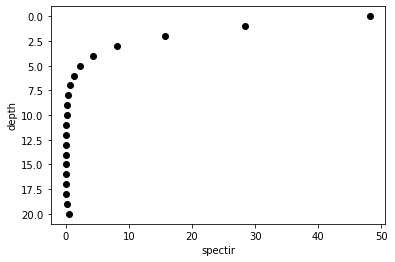

In [256]:
#dev
for i in range(len(wavelen_mean_list)):
    v=wavelen_mean_list[i]
    plt.scatter(v,i,c="k")
plt.gca().invert_yaxis()
#titling thing is not working :(
plt.title("Mean Spectral Irradiance for λ=",wavelengthnm_list[0],", in site=",mooring_list[0])
plt.ylabel("depth")
plt.xlabel("spectir")

In [97]:
#dev
#breaking it up further: doing the stat mask
k=-3
wavelength = wavelengthnm_list[j]
z_df = df3.loc[df3['z'] == k]

z_mean = z_df[wavelengthnm_list[j]].mean()
z_std = z_df[wavelengthnm_list[j]].std()
sigma2 = z_mean + 2*z_std
filtrd_z_df = z_df.loc[(z_df[wavelength] <= sigma2)]
filtrd_z_df
print(len(z_df)-len(filtrd_z_df))
#yess! there is a diff in length and therefore the filter has worked.

102


In [30]:
#remove erroneous depths: different for each location
#see maxdepths list above.

#oregon inshore
or_inshore = mooring_dfs[0]
or_inshore_filtered = filtered_mooring_dfs[0]
# =or_in_med.drop(or_in_med[or_in_med["z"] < maxdepths[0]].index)
#oregon shelf
or_shelf = mooring_dfs[1]
or_shelf_filtered = filtered_mooring_dfs[1]
# = or_sh_med.drop(or_sh_med[or_sh_med["z"] < maxdepths[1]].index)
#washington inshore
wa_inshore = mooring_dfs[2]
wa_inshore_filtered = filtered_mooring_dfs[2]
# = wa_in_med.drop(wa_in_med[wa_in_med["z"] < maxdepths[2]].index)
#washington shelf
wa_shelf = mooring_dfs[3]
wa_shelf_filtered = filtered_mooring_dfs[3]
# = wa_sh_med.drop(wa_sh_med[wa_sh_med["z"] < maxdepths[3]].index)

In [ ]:
#ONLY DO THIS FIRST TIME FOR 2S
len_comparison=[[len(or_inshore),len(or_shelf),len(wa_inshore),len(wa_shelf)],
                [len(or_inshore_filtered),len(or_shelf_filtered),
                 len(wa_inshore_filtered),len(wa_shelf_filtered)]]

len_comparison

In [319]:
#do this second time for 3σ
len_comparison.append([len(or_inshore_filtered),len(or_shelf_filtered),
                 len(wa_inshore_filtered),len(wa_shelf_filtered)])

len_comparison

[[49943, 99832, 40156, 54997],
 [23785, 24159, 16157, 8863],
 [24820, 24756, 16800, 9235],
 [24820, 24756, 16800, 9235]]

In [16]:
#filtering doing something if these are not zero
print("or inshore nrow diff is: ",(len(or_inshore)-len(or_inshore_filtered)))
print("or shelf nrow diff is: ",(len(or_shelf)-len(or_shelf_filtered)),":( !!!")
print("wa inshore nrow diff is: ",(len(wa_inshore)-len(wa_inshore_filtered)))
print("wa shelf nrow diff is: ",(len(wa_shelf)-len(wa_shelf_filtered)))

or inshore nrow diff is:  15432
or shelf nrow diff is:  41079 :( !!!
wa inshore nrow diff is:  14244
wa shelf nrow diff is:  36941


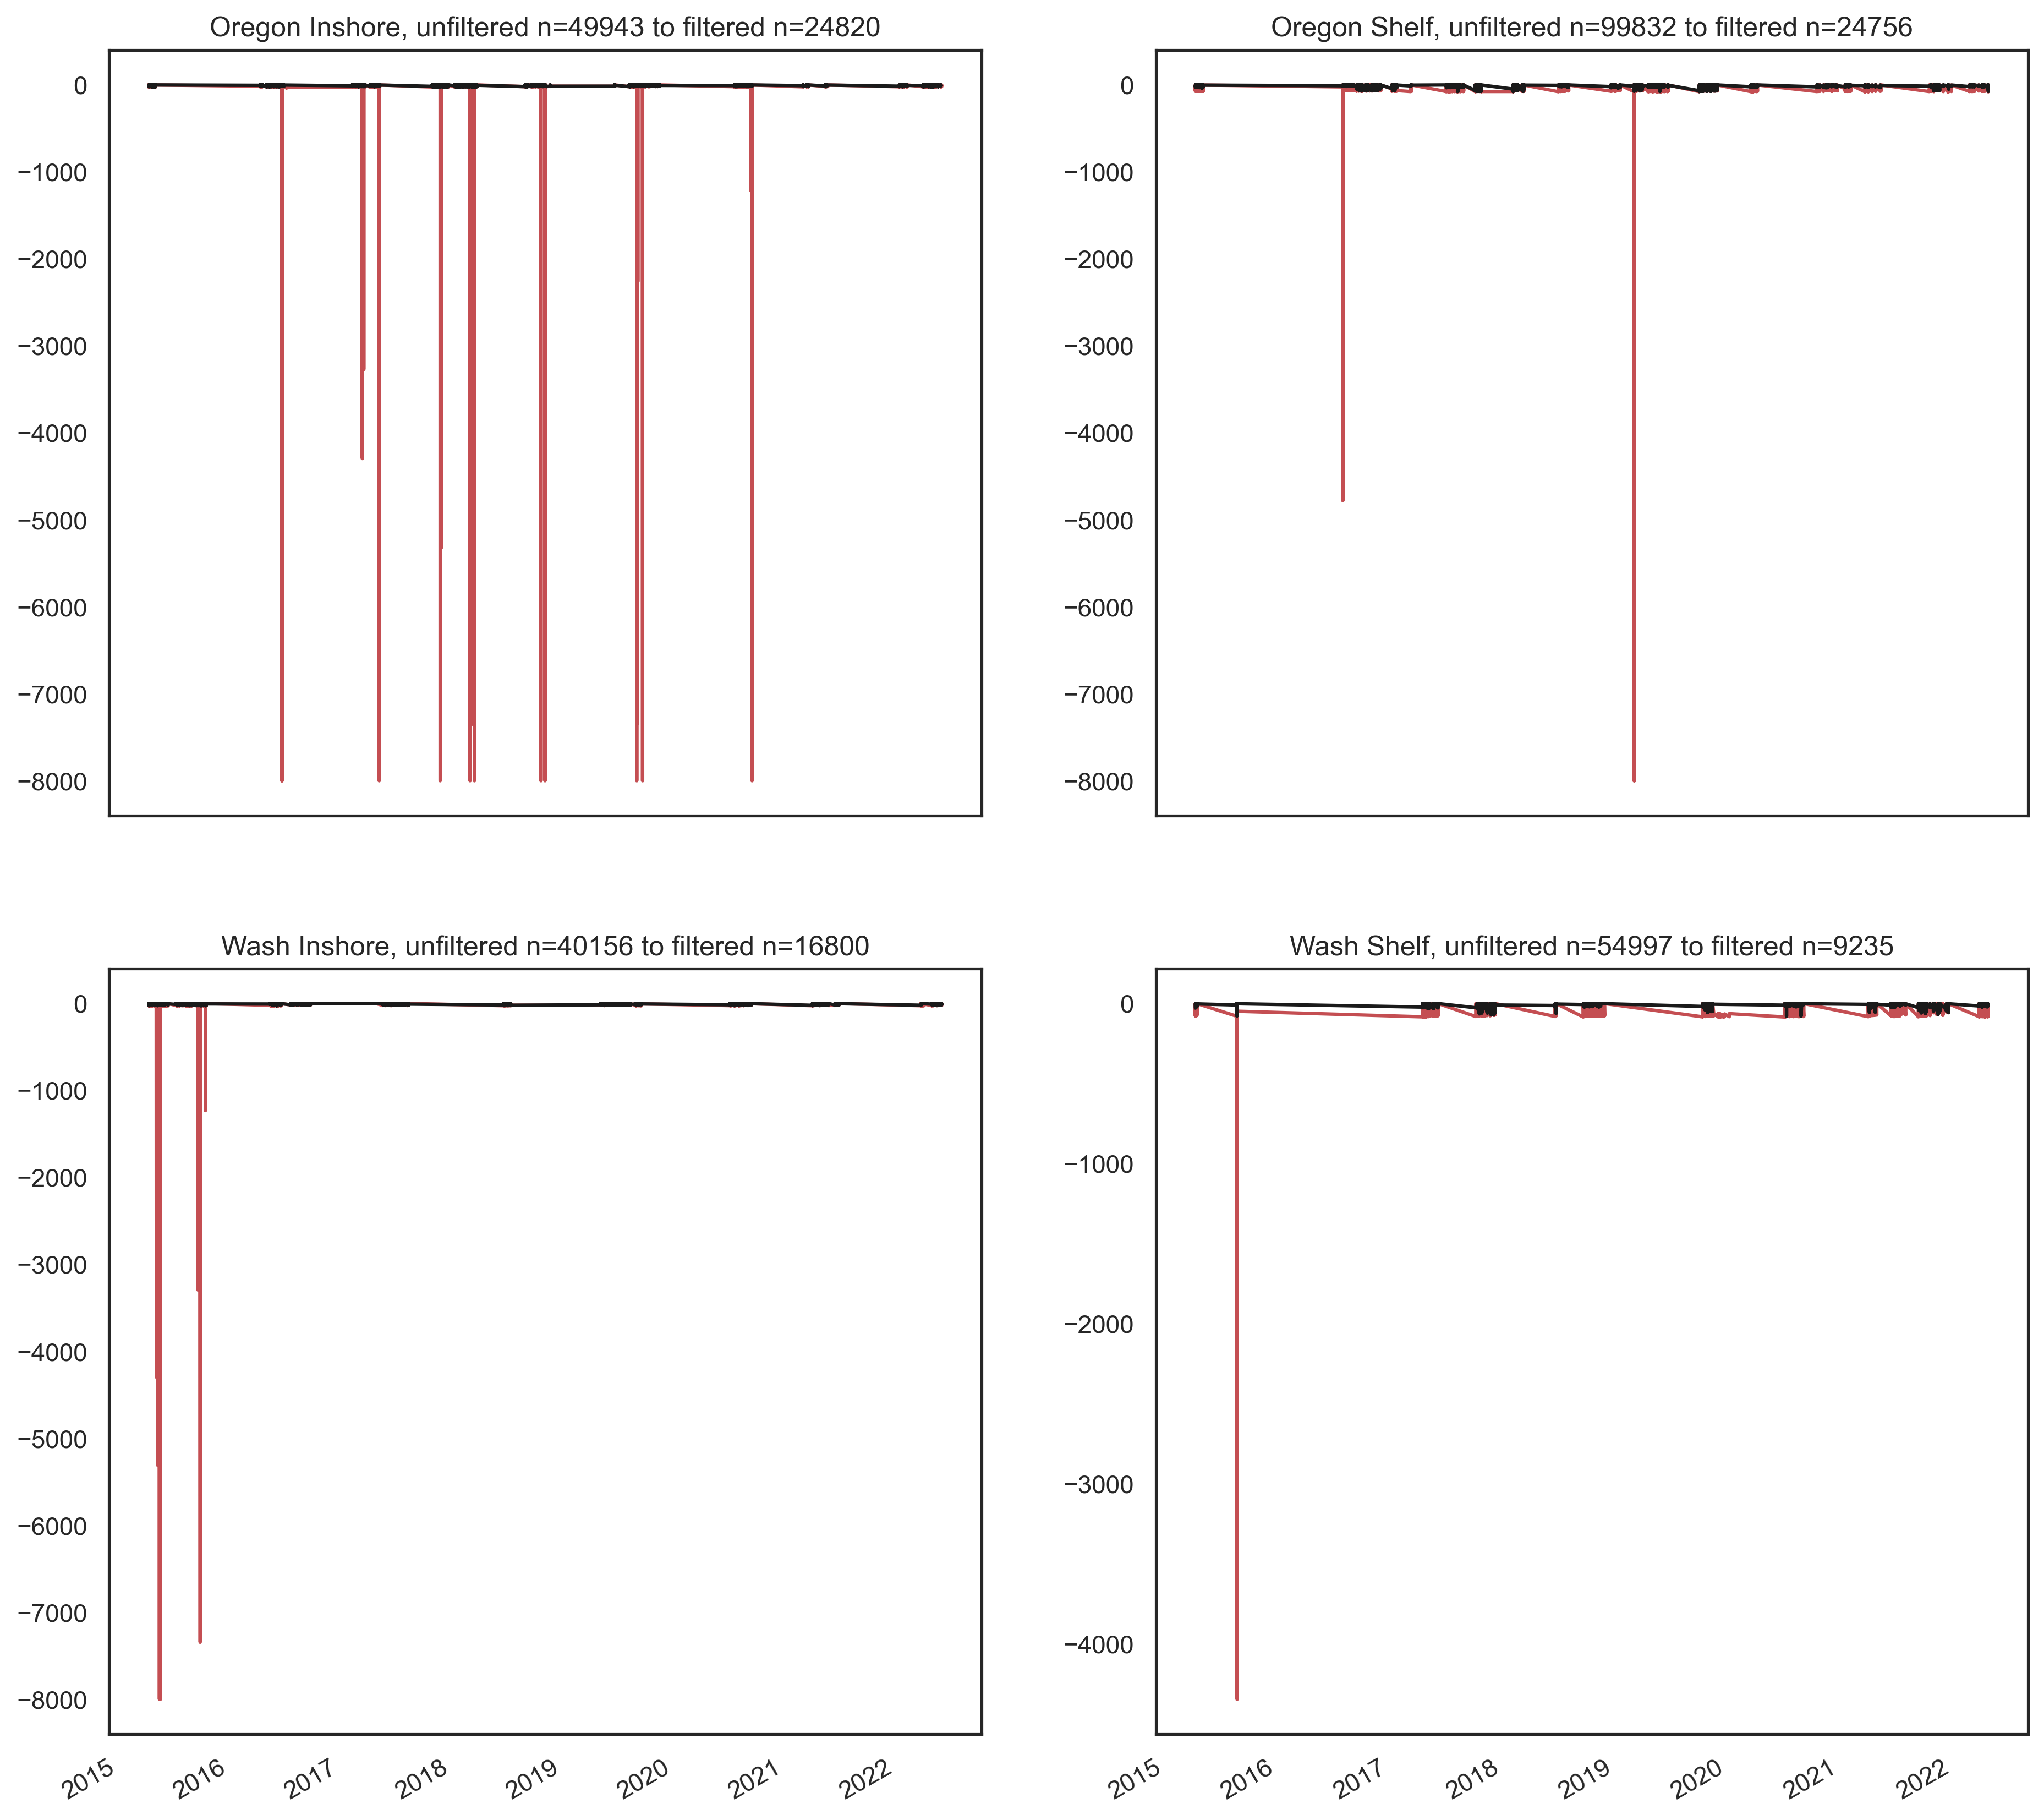

In [330]:
#filtering is doing something if you can see any red not covered by black
fig, ax = plt.subplots(2,2,figsize=(15, 15),dpi=300)
ax[0,0].plot(or_inshore["time"], or_inshore["z"], color = "r")
ax[0,0].plot(or_inshore_filtered["time"], or_inshore_filtered["z"], color = "k")
ax[0,0].set_title("Oregon Inshore, unfiltered n={0} to filtered n={1}".format(len(or_inshore),len(or_inshore_filtered)))

ax[0,1].plot(or_shelf["time"], or_shelf["z"], color = "r")
ax[0,1].plot(or_shelf_filtered["time"], or_shelf_filtered["z"], color = "k")
ax[0,1].set_title("Oregon Shelf, unfiltered n={0} to filtered n={1}".format(len(or_shelf),len(or_shelf_filtered)))


ax[1,0].plot(wa_inshore["time"], wa_inshore["z"], color = "r")
ax[1,0].plot(wa_inshore_filtered["time"], wa_inshore_filtered["z"], color = "k")
ax[1,0].set_title("Wash Inshore, unfiltered n={0} to filtered n={1}".format(len(wa_inshore),len(wa_inshore_filtered)))


ax[1,1].plot(wa_shelf["time"], wa_shelf["z"], color = "r")
ax[1,1].plot(wa_shelf_filtered["time"], wa_shelf_filtered["z"], color = "k")
ax[1,1].set_title("Wash Shelf, unfiltered n={0} to filtered n={1}".format(len(wa_shelf),len(wa_shelf_filtered)))

fig.autofmt_xdate()
plt.show()

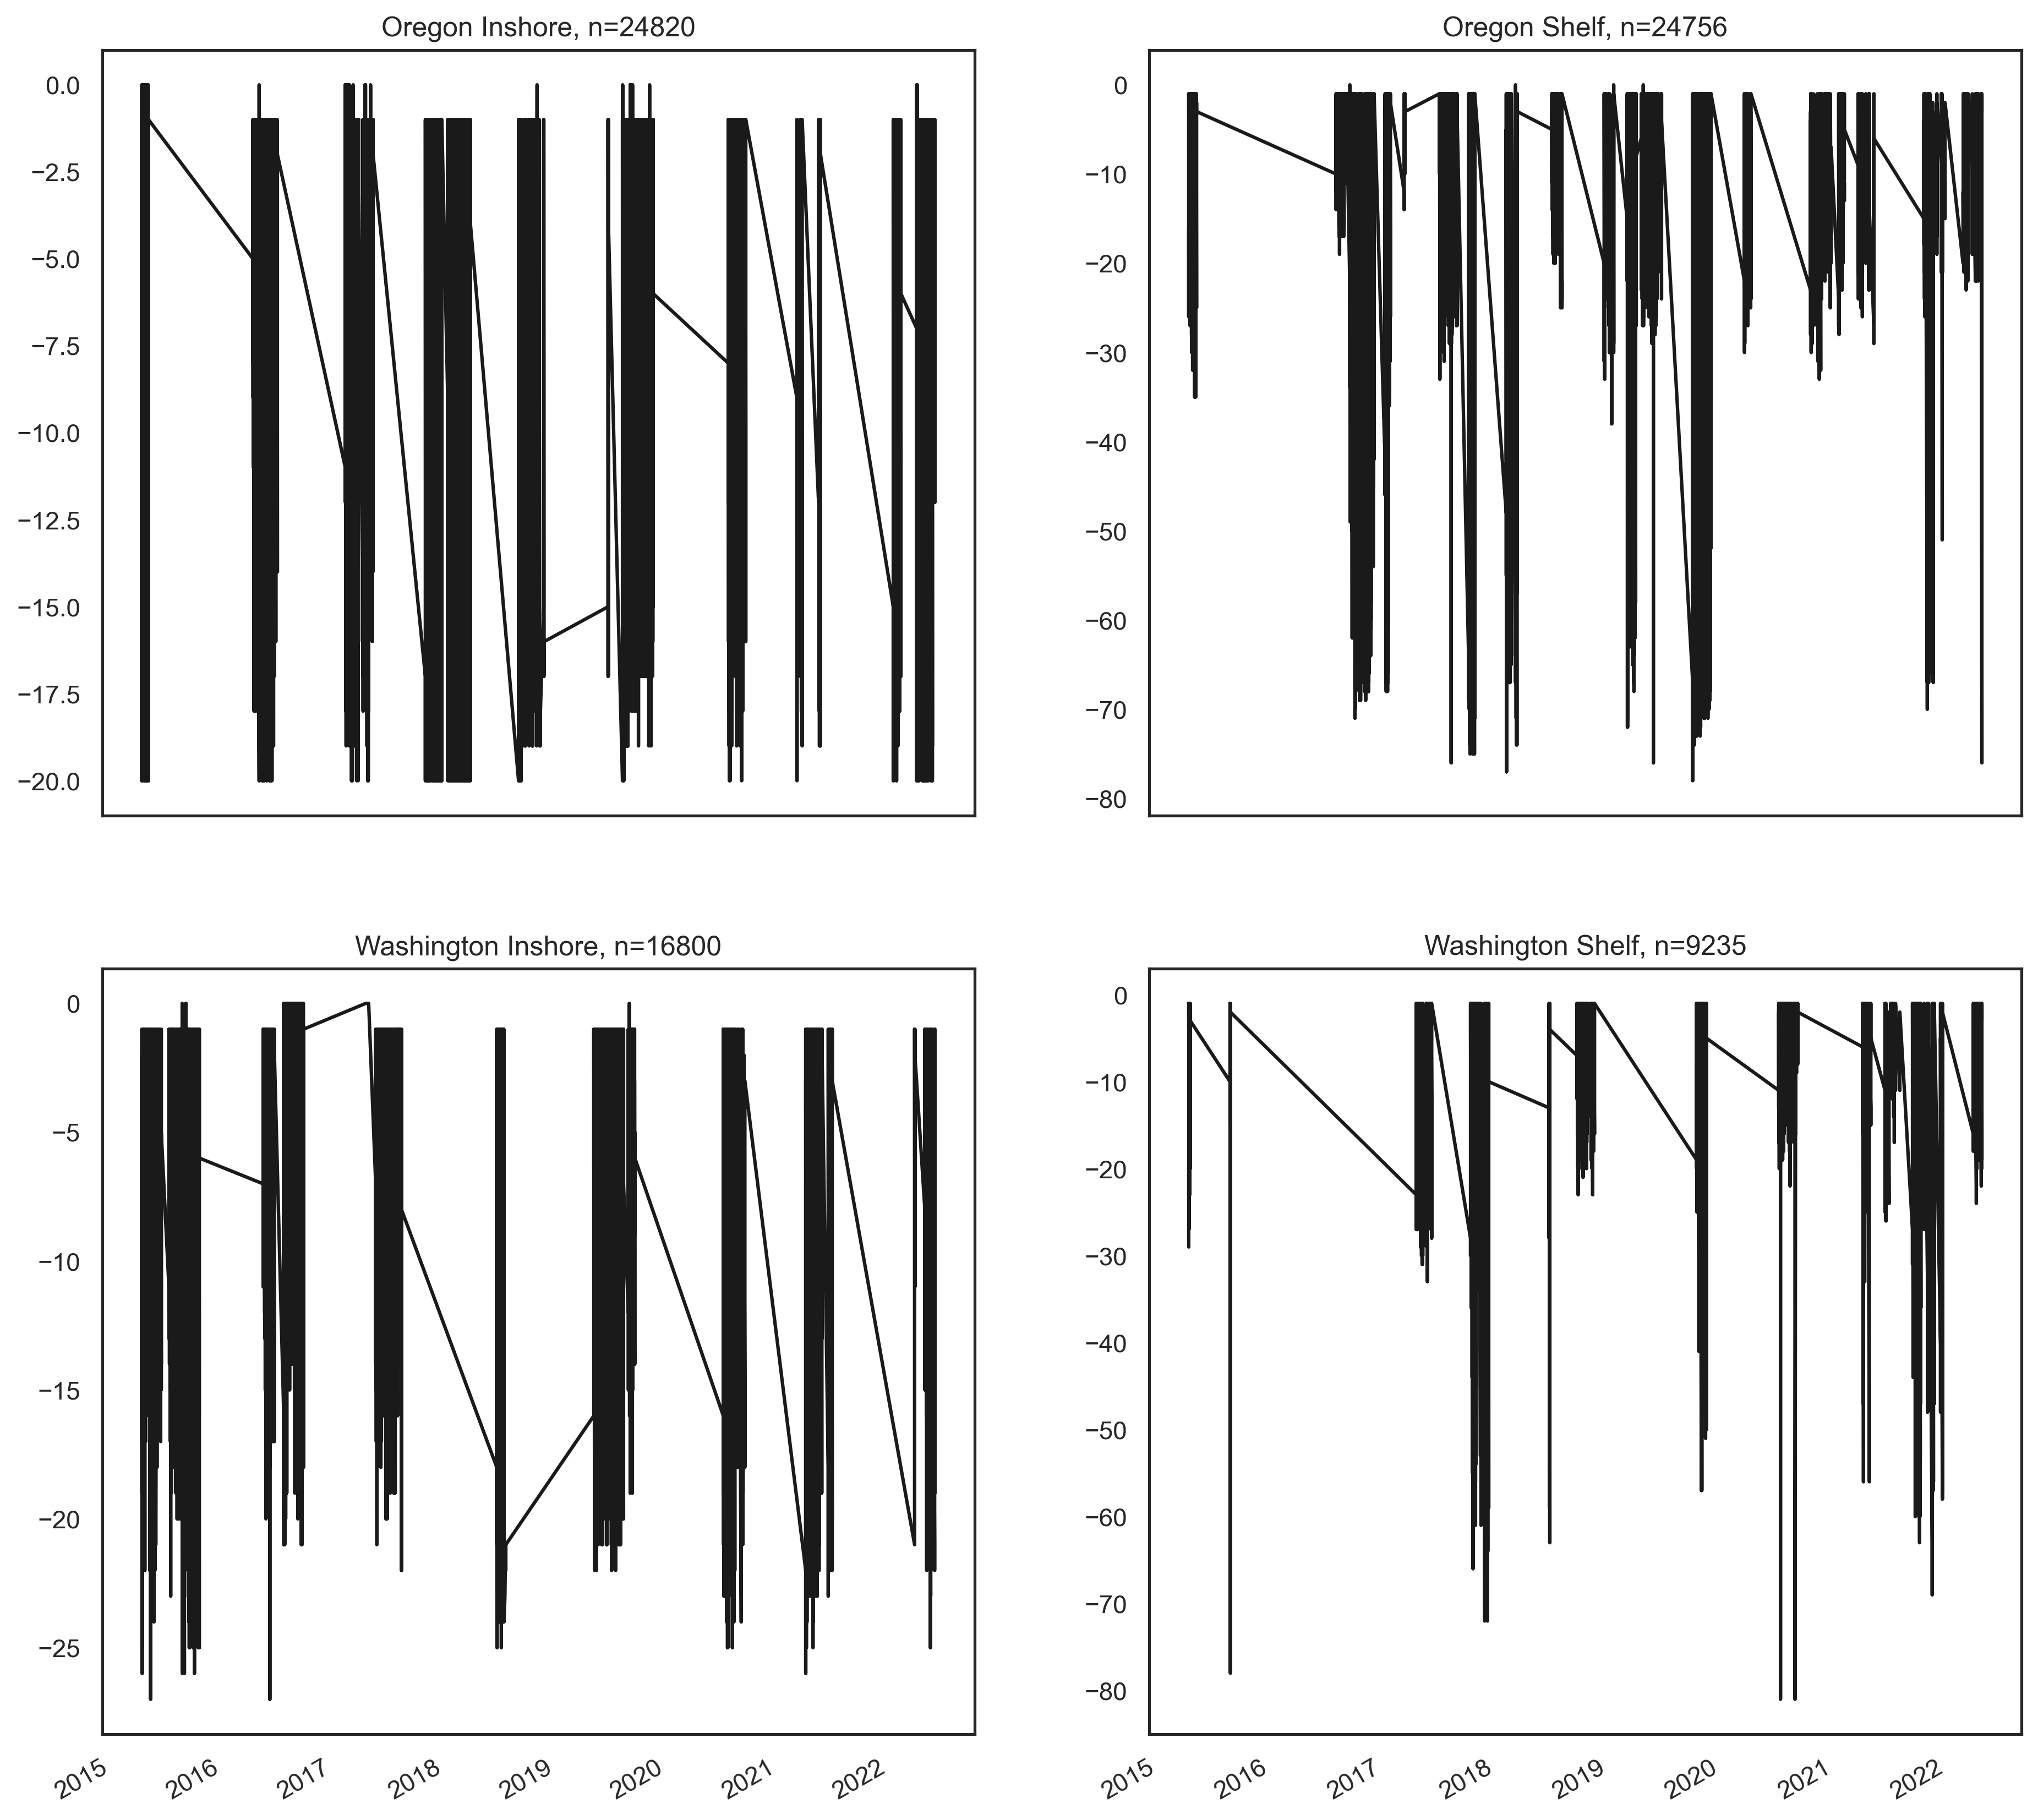

In [331]:
#same thing but limiting yrange to filtered max and min
fig, ax = plt.subplots(2,2,figsize=(15, 15),dpi=300)
#ax[0,0].plot(or_inshore["time"], or_inshore["z"], color = "r")
ax[0,0].plot(or_inshore_filtered["time"], or_inshore_filtered["z"], color = "k")
ax[0,0].set_title("Oregon Inshore, n={}".format(len(or_inshore_filtered)))

#ax[0,1].plot(or_shelf["time"], or_shelf["z"], color = "r")
ax[0,1].plot(or_shelf_filtered["time"], or_shelf_filtered["z"], color = "k")
ax[0,1].set_title("Oregon Shelf, n={}".format(len(or_shelf_filtered)))

#ax[1,0].plot(wa_inshore["time"], wa_inshore["z"], color = "r")
ax[1,0].plot(wa_inshore_filtered["time"], wa_inshore_filtered["z"], color = "k")
ax[1,0].set_title("Washington Inshore, n={}".format(len(wa_inshore_filtered)))

#ax[1,1].plot(wa_shelf["time"], wa_shelf["z"], color = "r")
ax[1,1].plot(wa_shelf_filtered["time"], wa_shelf_filtered["z"], color = "k")
ax[1,1].set_title("Washington Shelf, n={}".format(len(wa_shelf_filtered)))
fig.autofmt_xdate()
plt.show()

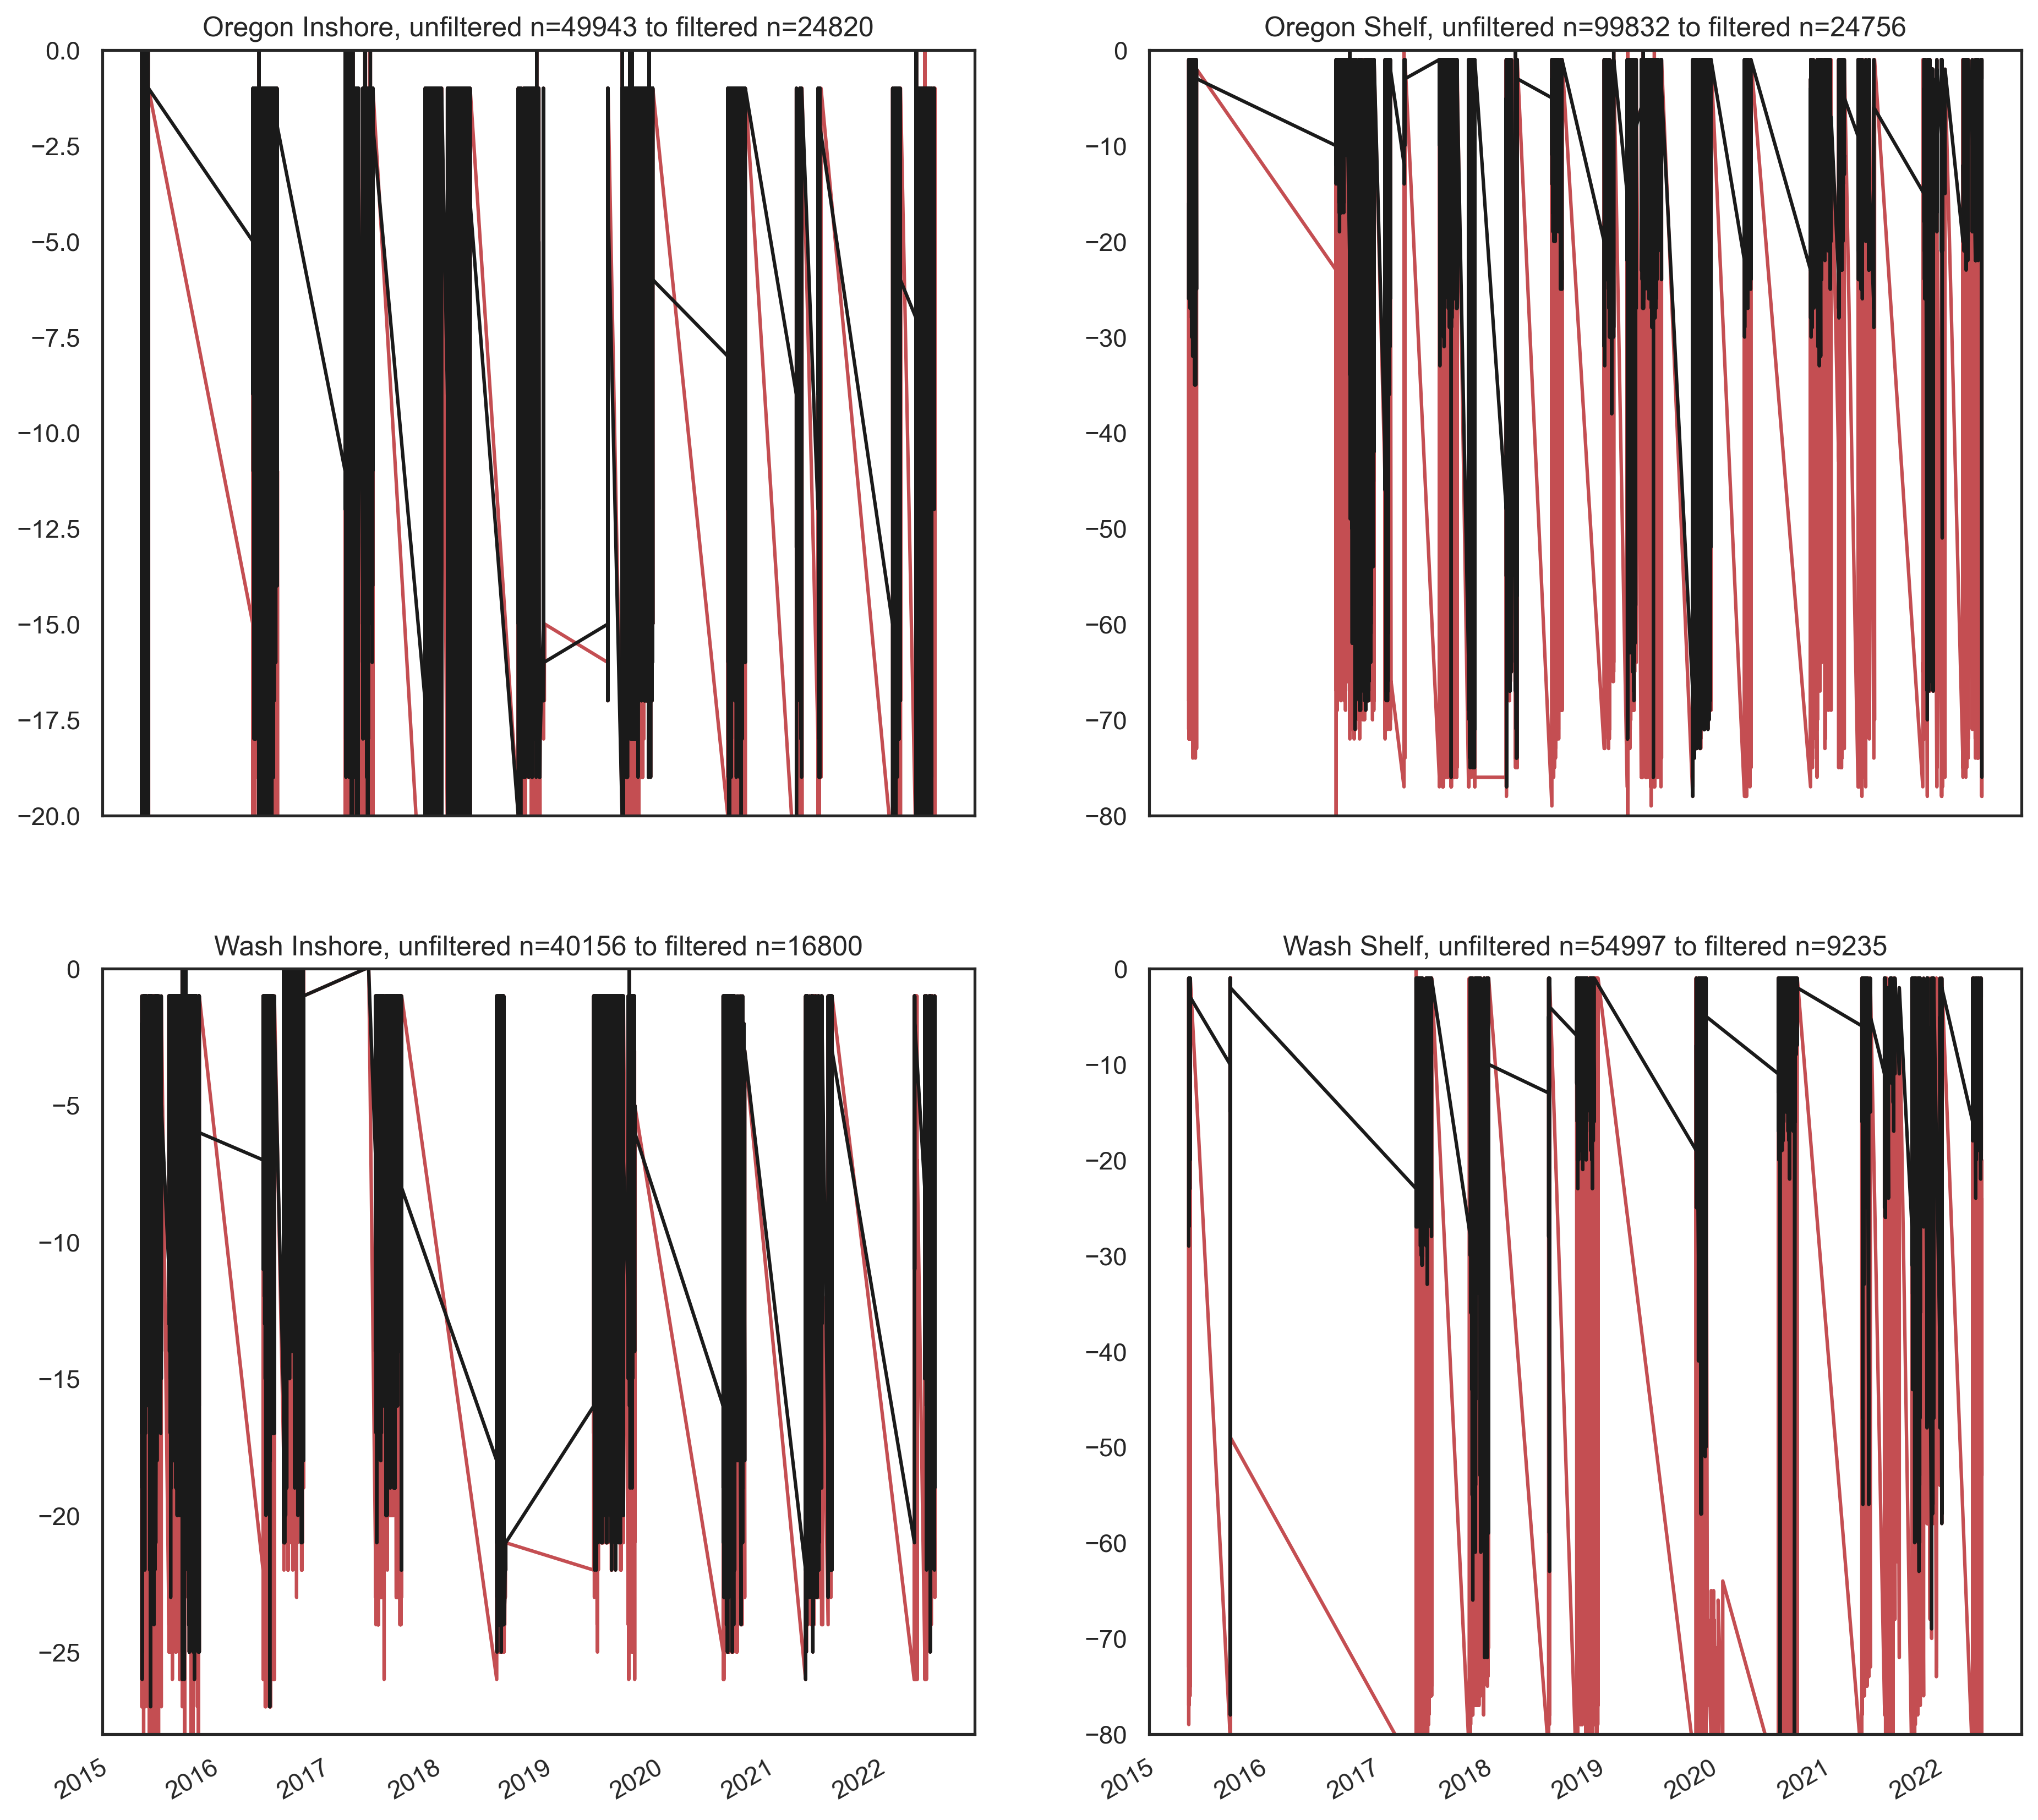

In [333]:
#filtering is doing something if you can see any red not covered by black
#change range to 
fig, ax = plt.subplots(2,2,figsize=(15, 15),dpi=300)
ax[0,0].plot(or_inshore["time"], or_inshore["z"], color = "r")
ax[0,0].plot(or_inshore_filtered["time"], or_inshore_filtered["z"], color = "k")
ax[0,0].set_title("Oregon Inshore, unfiltered n={0} to filtered n={1}".format(len(or_inshore),len(or_inshore_filtered)))
ax[0,0].set_ylim([-20, 0])

ax[0,1].plot(or_shelf["time"], or_shelf["z"], color = "r")
ax[0,1].plot(or_shelf_filtered["time"], or_shelf_filtered["z"], color = "k")
ax[0,1].set_title("Oregon Shelf, unfiltered n={0} to filtered n={1}".format(len(or_shelf),len(or_shelf_filtered)))
ax[0,1].set_ylim([-80, 0])

ax[1,0].plot(wa_inshore["time"], wa_inshore["z"], color = "r")
ax[1,0].plot(wa_inshore_filtered["time"], wa_inshore_filtered["z"], color = "k")
ax[1,0].set_title("Wash Inshore, unfiltered n={0} to filtered n={1}".format(len(wa_inshore),len(wa_inshore_filtered)))
ax[1,0].set_ylim([-28, 0])

ax[1,1].plot(wa_shelf["time"], wa_shelf["z"], color = "r")
ax[1,1].plot(wa_shelf_filtered["time"], wa_shelf_filtered["z"], color = "k")
ax[1,1].set_title("Wash Shelf, unfiltered n={0} to filtered n={1}".format(len(wa_shelf),len(wa_shelf_filtered)))
ax[1,1].set_ylim([-80, 0])
fig.autofmt_xdate()
plt.show()

In [276]:
or_inshore_filtered["spectir_555nm"].max()
or_inshore_filtered["spectir_555nm"].min()

4.13717e-05

In [ ]:
# define subplot grid
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Filtered Washington Inshore Spectral Irradiance", fontsize=18, y=0.95)



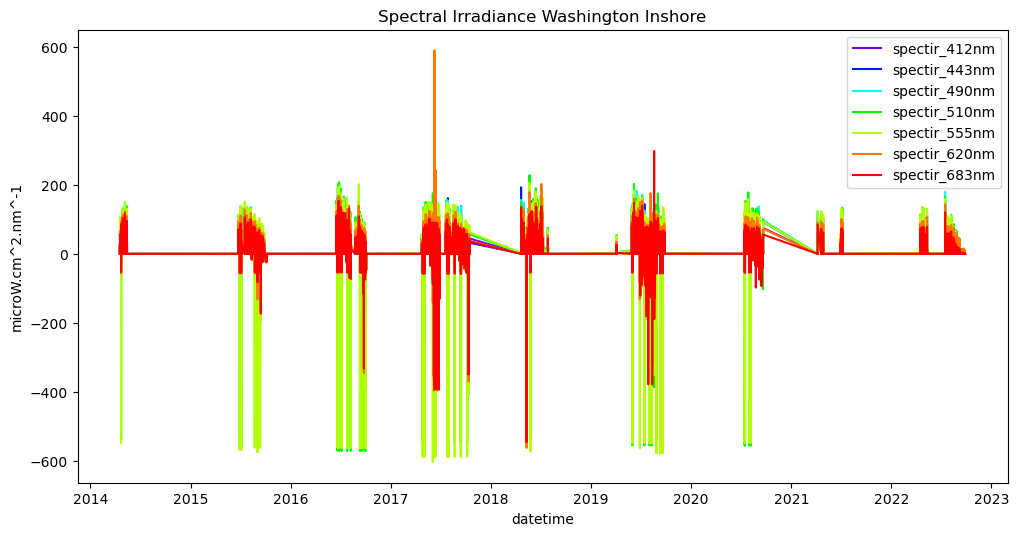

In [47]:
#i guess do all 4 of these by hand?
plt.figure(figsize=(12,6), dpi=100)
for i in range(0,7):
    plt.plot(or_inshore["time"], or_inshore[wavelengthnm_list[i]], 
             label = wavelengthnm_list[i], color = pal[i])


plt.title('Spectral Irradiance Washington Inshore')
plt.xlabel("datetime")
plt.ylabel("microW.cm^2.nm^-1")
plt.legend(facecolor="white")

In [31]:
#pivoting data to scatter plot: making data "long"
#when plotting spectir by z we can see erroneous points in both dims
or_inshore_pivoted = pd.melt(or_inshore_filtered, id_vars=['time', 'z'], value_vars=wavelengthnm_list,var_name='wavelength', 
                           value_name='spectir')
or_shelf_pivoted = pd.melt(or_shelf_filtered, id_vars=['time', 'z'], value_vars=wavelengthnm_list,var_name='wavelength', 
                           value_name='spectir')
wa_inshore_pivoted = pd.melt(wa_inshore_filtered, id_vars=['time', 'z'], value_vars=wavelengthnm_list,var_name='wavelength', 
                           value_name='spectir')
wa_shelf_pivoted = pd.melt(wa_shelf_filtered, id_vars=['time', 'z'], value_vars=wavelengthnm_list,var_name='wavelength', 
                           value_name='spectir')

In [33]:
#i want to see unfiltered data pivoted so i can do histograms.
#pivoting data to scatter plot: making data "long"
#when plotting spectir by z we can see erroneous points in both dims
or_inshorepivoted = pd.melt(or_inshore, id_vars=['time', 'z'], value_vars=wavelengthnm_list,var_name='wavelength', 
                           value_name='spectir')
or_shelfpivoted = pd.melt(or_shelf, id_vars=['time', 'z'], value_vars=wavelengthnm_list,var_name='wavelength', 
                           value_name='spectir')
wa_inshorepivoted = pd.melt(wa_inshore, id_vars=['time', 'z'], value_vars=wavelengthnm_list,var_name='wavelength', 
                           value_name='spectir')
wa_shelfpivoted = pd.melt(wa_shelf, id_vars=['time', 'z'], value_vars=wavelengthnm_list,var_name='wavelength', 
                           value_name='spectir')

In [34]:
#we want these spectir mins to be just above 0
print(or_inshorepivoted["spectir"].min())
print(or_shelfpivoted["spectir"].min())
print(wa_inshorepivoted["spectir"].min())
print(wa_shelfpivoted["spectir"].min())
#success

-603.989492929
-592.0489758017
-593.7948599033
-587.2446116252


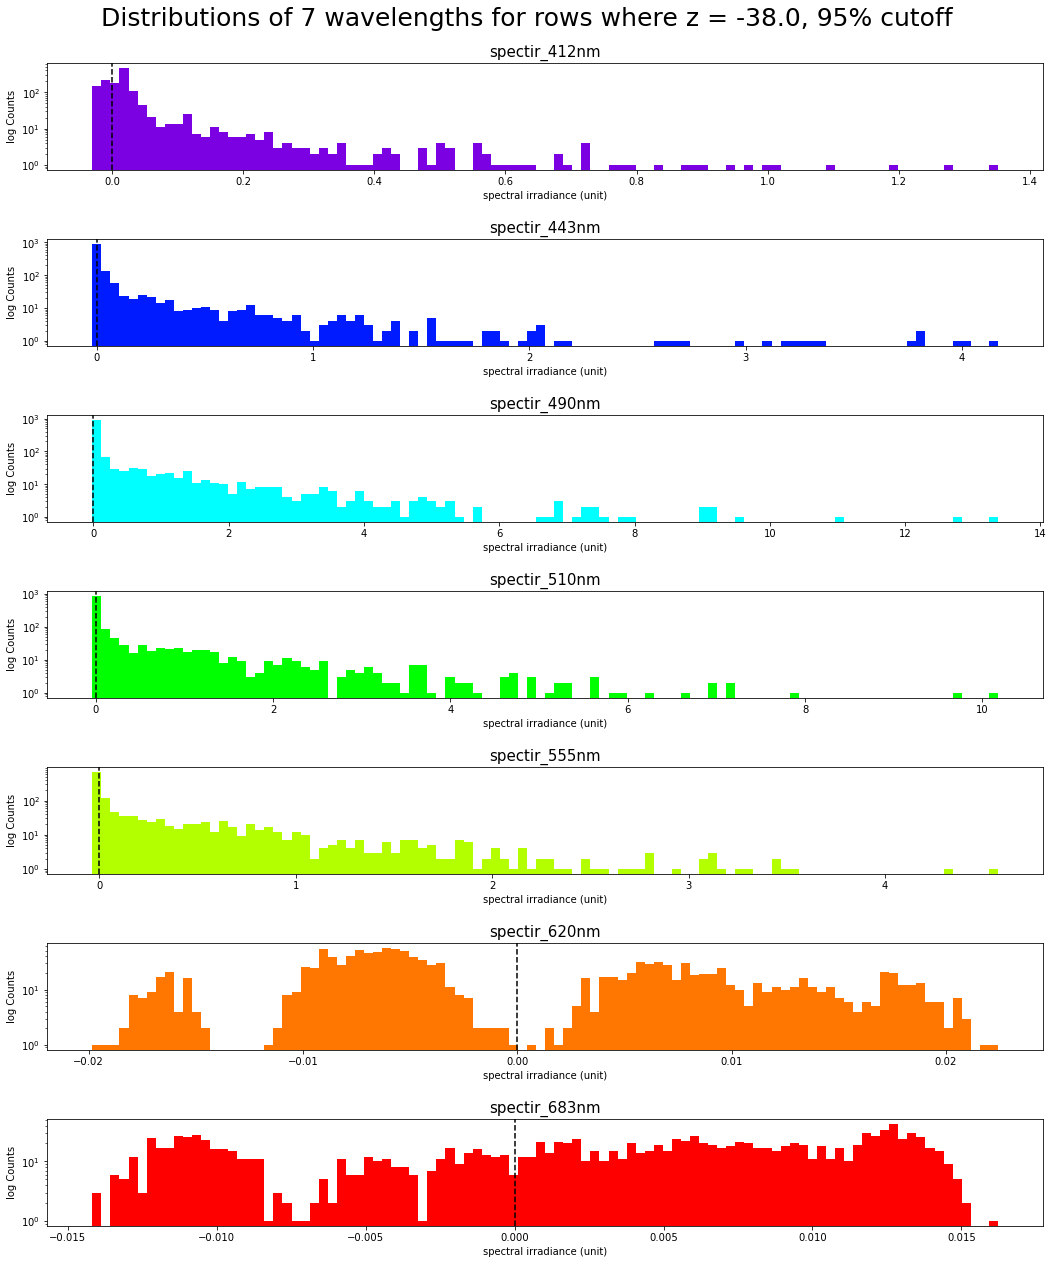

In [93]:
#i want to see one depth's 7 wavelength distributions
subset_df = or_shelf[or_shelf['z'] == -36.0]   
fig, axs = plt.subplots(nrows=7, figsize=(15, 18))      
for i, col in enumerate(wavelengthnm_list):
    ax = axs[i]
    ax.hist(subset_df[col], bins=100, color=pal[i])
    ax.set_title(col, fontsize=15)
    ax.set_xlabel('spectral irradiance (unit)', fontsize=10)
    ax.set_ylabel('log Counts', fontsize=10)
    ax.set_yscale('log')
    #percentile_95 = np.percentile(subset_df[col], 95)
    ax.axvline(x=0, color='k', linestyle='--')

# Add a title to the plot
fig.suptitle('Distributions of 7 wavelengths for rows where z = -38.0, 95% cutoff', fontsize=25)
fig.tight_layout(pad=2.0)
# Display the plot

plt.savefig("log or_shelf spectir by depth z36_ 95cutoff.png")

In [63]:
#now make this into gif hehe
import imageio
import os

def gif_maker_distribs(df,depth_list,gif_name,title):
    filenames = []
    for i in range(len(depth_list)):
        #make plot
        
        subset_df = df[df['z'] == i]   
        fig, axs = plt.subplots(nrows=7, figsize=(15, 18))      
        for i, col in enumerate(wavelengthnm_list):
            ax = axs[i]
            ax.hist(subset_df[col], bins=50, color=pal[i])
            ax.set_title(col, fontsize=12)
            ax.set_xlabel('spectral irradiance (unit)', fontsize=10)
            ax.set_ylabel('Log Frequency', fontsize=10)
            #ax.set_yscale('log')
            percentile_95 = np.percentile(subset_df[col], 95)
            ax.axvline(x=percentile_95, color='red', linestyle='--')
            fig.suptitle('Distributions of 7 wavelengths for rows where z = {}, 95% cutoff'.format(i))
            fig.tight_layout(pad=2.0)

        # create file name and append it to a list
        filename = 'z_distrib_animation{}.png'.format(str(int(depth_list[i])))
        filenames.append(filename)
        # save frame
        plt.savefig(filename,bbox_inches='tight')
        plt.close()

    # build gif
    with imageio.get_writer(gif_name, mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Remove files
    for filename in set(filenames):
        os.remove(filename)

IndexError: index -1 is out of bounds for axis 0 with size 0

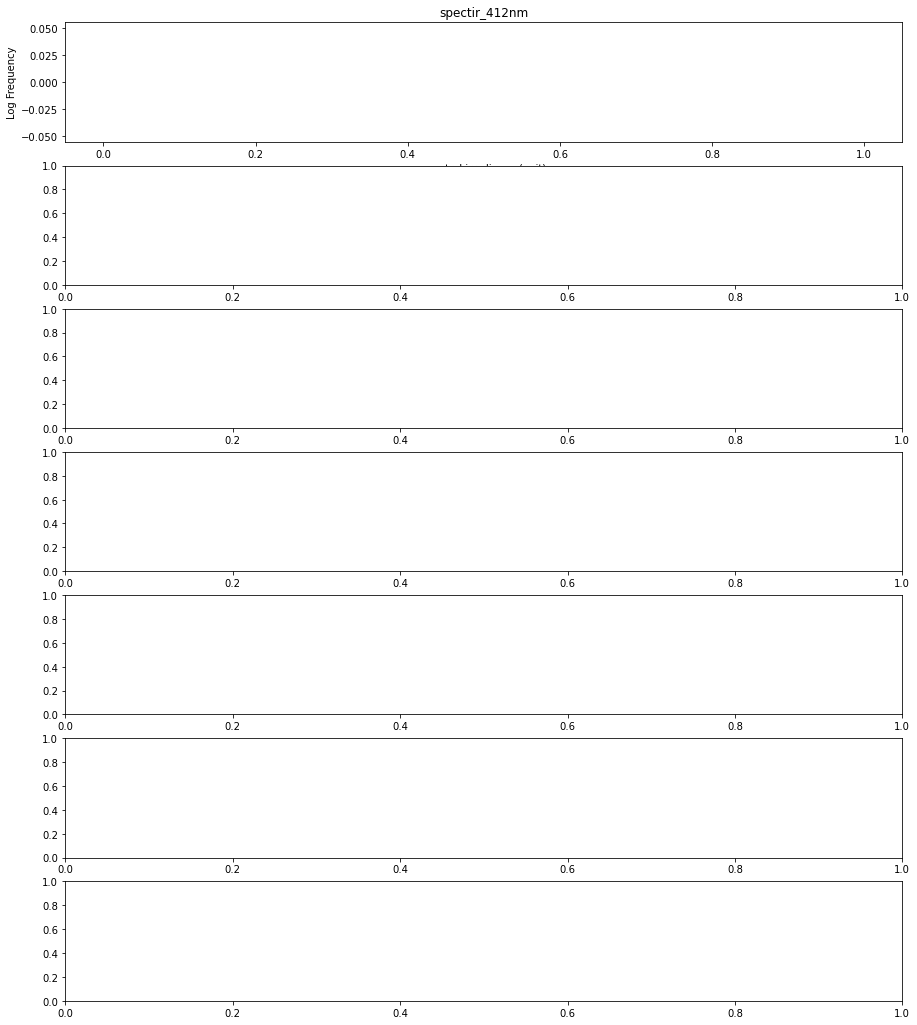

In [67]:
depths = list(or_inshore['z'].unique())
#depths_filtered = list(range(-33,1))

depths.sort(reverse=True)

gif_maker_distribs(or_inshore,depths,'or_inshore_distribs_by_z.gif', "Oregon Inshore")

In [285]:
s3 = "Spectral Irradiance by Depth for %s, n= %s" % (title_chunk, unpivoted_length)
print(s3)

NameError: name 'title_chunk' is not defined

In [341]:
#now to scatter plot them:
#scatter plot function:
def scatter_plotter(pivoted_df, title_chunk, unpivoted_length):
    sns.relplot(data=pivoted_df, x='spectir', y='z', hue='wavelength', 
                hue_order=wavelengthnm_list, palette = pal, aspect=1.61)
    plt.xlabel("spectral irradiance (microW.cm^2.nm^-1)")
    plt.ylabel("depth (m)")
    plt.title("Spectral Irradiance by Depth for %s, n= %s" % (title_chunk, unpivoted_length))
    #plt.savefig(title_chunk+"_spectir_scatter.png", dpi=600)
    plt.show()

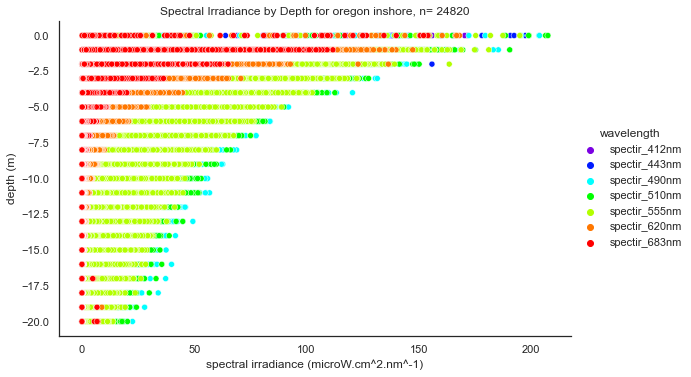

In [342]:
scatter_plotter(or_inshore_pivoted, "oregon inshore", len(or_inshore_filtered))

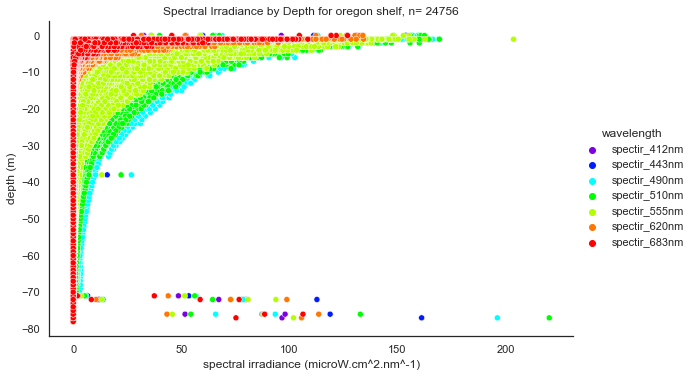

In [343]:
scatter_plotter(or_shelf_pivoted, "oregon shelf", len(or_shelf_filtered))

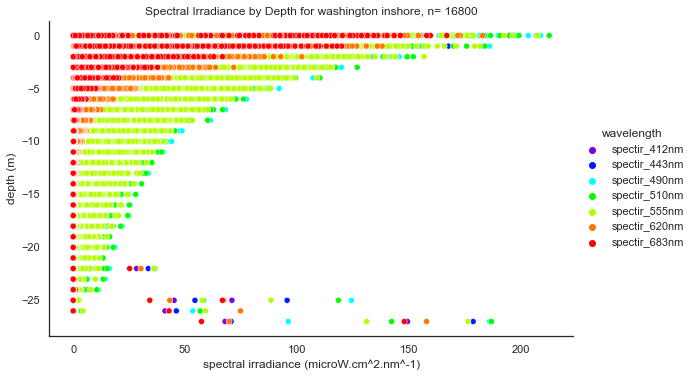

In [344]:
scatter_plotter(wa_inshore_pivoted, "washington inshore", len(wa_inshore_filtered))

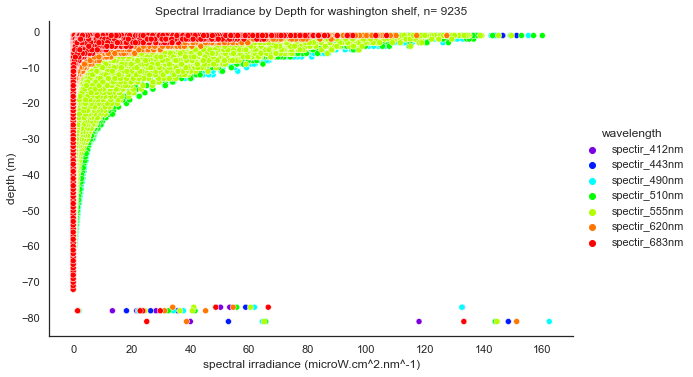

In [345]:
scatter_plotter(wa_shelf_pivoted, "washington shelf", len(wa_shelf_filtered))

In [300]:
def depth_profiler_line(df_pivoted,title):
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    g = sns.FacetGrid(df_pivoted, col ="wavelength", hue="wavelength",  palette=pal, aspect=.4, height=5)
    g.map(sns.scatterplot, "spectir", "z")
    g.fig.suptitle(title)
    g.set_titles("")
    g.set(ylabel="depth (m)")
    g.set(xlabel="")
    g.despine(left=True)
    

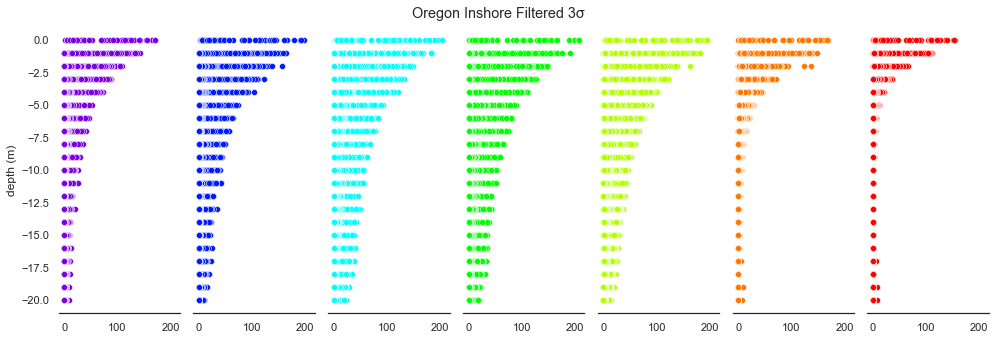

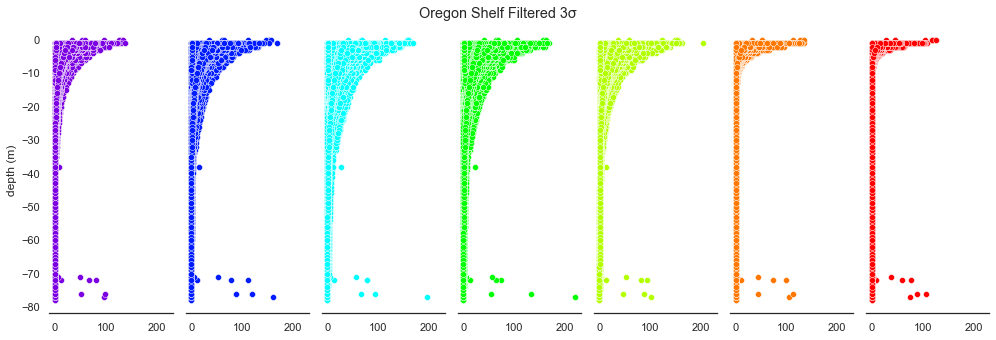

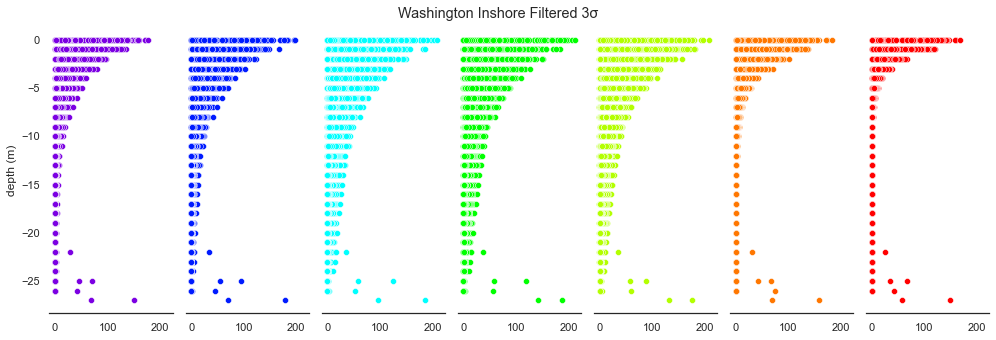

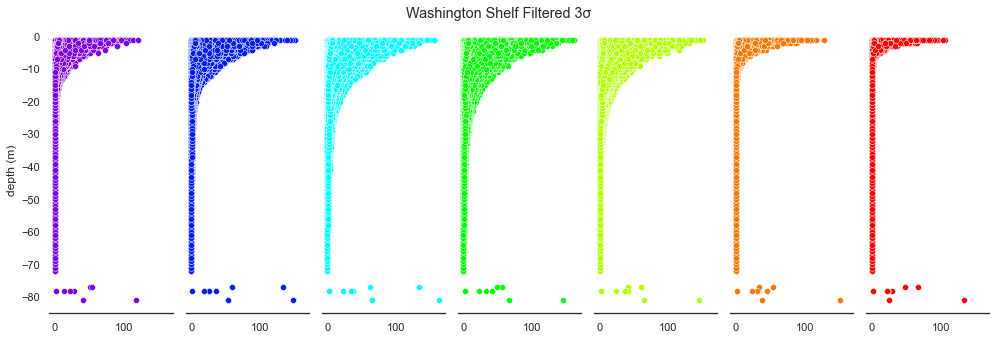

In [347]:
depth_profiler_line(or_inshore_pivoted,"Oregon Inshore Filtered 3σ")
depth_profiler_line(or_shelf_pivoted,"Oregon Shelf Filtered 3σ")
depth_profiler_line(wa_inshore_pivoted,"Washington Inshore Filtered 3σ")
depth_profiler_line(wa_shelf_pivoted,"Washington Shelf Filtered 3σ")